In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [2]:
#hide
!pip install fastbook
import fastbook
fastbook.setup_book()
     

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 26.0 MB/s eta 0:00:00


In [3]:

from fastbook import *
from fastai.vision.widgets import *

In [4]:
fender = search_images_ddg("fender stratocaster")
gibson = search_images_ddg("gibson les paul")

In [5]:
fender_images = fender
len(fender_images), fender_images

(200,
 (#200) ['https://d1aeri3ty3izns.cloudfront.net/media/32/324624/1200/preview.jpg','https://cdn.shopify.com/s/files/1/1140/2426/products/Fender-American-Ultra-Stratocaster-HSS-Electric-Guitar-Rosewood-Fingerboard-Aged-Natural-14162_1600x1600.jpg?v=1573582880','https://www.zikinf.com/_gfx/matos/dyn/large/fender-deluxe-lone-star-stratocaster_7.jpg','https://shop.guitarpoint.de/media/images/info/Fender1966StratBlk194190_2.jpg','https://www.ginoguitars.com/images/products/Fender-Custom-1960-Stratocaster-Heavy-Relic-342-OW_01.jpg','https://wildwestguitars.com/images/2/2279/fender-1959-stratocaster-hh-relic-black-r81070-left__wwg.jpg','https://www.gitarrebass.de/wp-content/uploads/2015/03/1954-Fender-Stratocaster.png','http://www.promusicalaska.com/wp-content/uploads/2015/09/Fender-Squier-HSS-Stratocaster-Candy-Apple-Red-Frontman-15G-Pack-Gear.jpg','https://shop.guitarpoint.de/media/images/info/Fender73StratSBRW515767_2.jpg','https://d1aeri3ty3izns.cloudfront.net/media/20/204060/1200/pr

In [6]:
gibson_images = gibson
len(gibson_images)

200

In [7]:
dest = "images/fender_images/fender.jpg"
download_url(fender_images[0], dest)

Path('images/fender_images/fender.jpg')

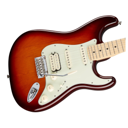

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

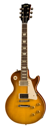

In [9]:
dest = "images/gibson_images/gibson.jpg"
download_url(gibson_images[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [10]:
"""import shutil
shutil.rmtree("/kaggle/working/guitars")"""

'import shutil\nshutil.rmtree("/kaggle/working/guitars")'

In [11]:
# mkdir

guitar_types = ['fender stratocaster', 'gibson les paul', 'ibanez jem', 'gibson flying v',
               'fender telecaster', "fender nocaster", "fender jazzmaster", "ibanez martin miller", 
                "charvel guthrie govan signature", "suhr modern", "suhr classic s", "suhr classic t",
               "suhr standart", "james tyler", "danelectro"]
path = Path("guitars")
path.mkdir()

In [12]:

for o in guitar_types:
    dest = (path/o)
    dest.mkdir(exist_ok=False)
    results = search_images_ddg(f'{o}')
    download_images(dest, urls=results)




In [13]:
!ls guitars

'charvel guthrie govan signature'  'fender telecaster'	   'james tyler'
 danelectro			   'gibson flying v'	   'suhr classic s'
'fender jazzmaster'		   'gibson les paul'	   'suhr classic t'
'fender nocaster'		   'ibanez jem'		   'suhr modern'
'fender stratocaster'		   'ibanez martin miller'  'suhr standart'


In [14]:
files = get_image_files(path)
files

(#2862) [Path('guitars/charvel guthrie govan signature/4a4f428d-f22e-4e9e-a346-500fe860c3d7.jpg'),Path('guitars/charvel guthrie govan signature/9805f182-c4ba-42bd-8f7f-402ff88aefcb.jpg'),Path('guitars/charvel guthrie govan signature/51385e2b-c333-45e5-a5be-70dbaff6fc3a.jpg'),Path('guitars/charvel guthrie govan signature/aadc51df-a1e8-4437-ad09-9a00b3acc9fb.jpg'),Path('guitars/charvel guthrie govan signature/b1faf2d8-c53b-4bff-b7fa-ea84ca752e11.jpg'),Path('guitars/charvel guthrie govan signature/d6b0b5ea-11cd-44d7-a94a-ae6e1eca8ffe.jpg'),Path('guitars/charvel guthrie govan signature/fa45ec6b-1e17-45a6-bafe-84471bd465bf.png'),Path('guitars/charvel guthrie govan signature/150bf89d-d192-49ba-8a03-05887127a87b.jpg'),Path('guitars/charvel guthrie govan signature/5468e247-c519-42b0-88c7-46d55c95d5dd.jpg'),Path('guitars/charvel guthrie govan signature/040be460-0daf-404f-8062-6dd0442f8d46.jpg')...]

In [15]:
failed = verify_images(files)
failed

(#20) [Path('guitars/charvel guthrie govan signature/b102ff5c-5950-4cfd-8b34-03993ef5c946.jpg'),Path('guitars/charvel guthrie govan signature/f6dc8b18-f8d6-43f3-89e6-23be52adf7f6.jpg'),Path('guitars/fender nocaster/8376810a-8005-4709-935e-5a11db9371db.jpg'),Path('guitars/fender nocaster/cc0cf367-d05c-4198-be75-ff328914e5bd.jpg'),Path('guitars/fender nocaster/6e129e21-cbaa-457a-a225-53b11ad3228d.jpg'),Path('guitars/gibson les paul/c28a3964-958d-4326-96ae-0502a4e0a2b5.jpg'),Path('guitars/gibson les paul/1c941bf3-a7cd-44ab-9431-42739a9e655d.jpg'),Path('guitars/gibson les paul/1d3b4615-3941-4bd9-9e9a-6d73e8b7b376.jpg'),Path('guitars/danelectro/f3713536-5f9d-4c80-a6a8-43bc20161474.jpg'),Path('guitars/danelectro/365e9c32-07ab-4bd7-96c0-800981daa55f.jpg')...]

In [16]:
failed.map(Path.unlink);

In [17]:

guitars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

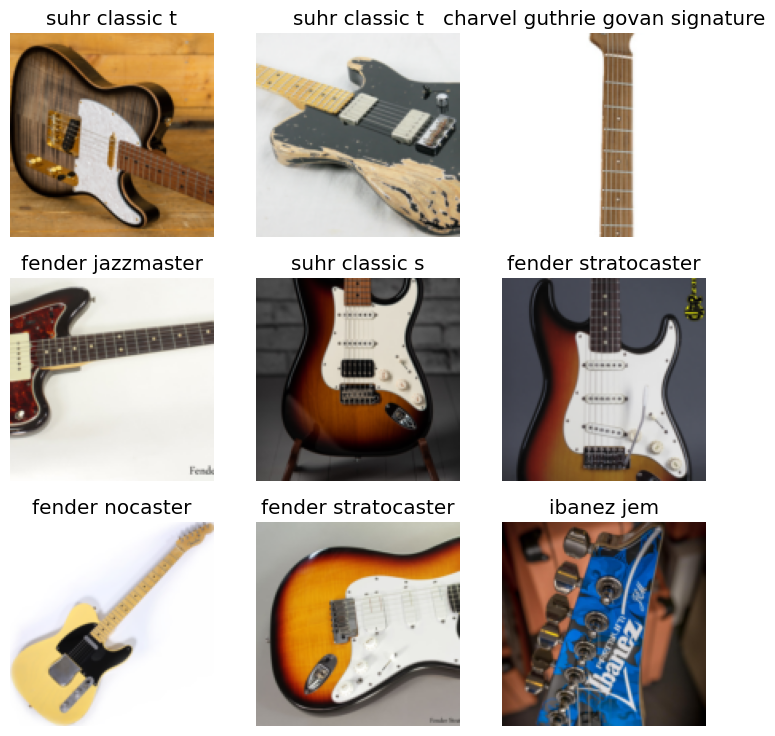

In [18]:
dls = guitars.dataloaders(path)
dls.show_batch()

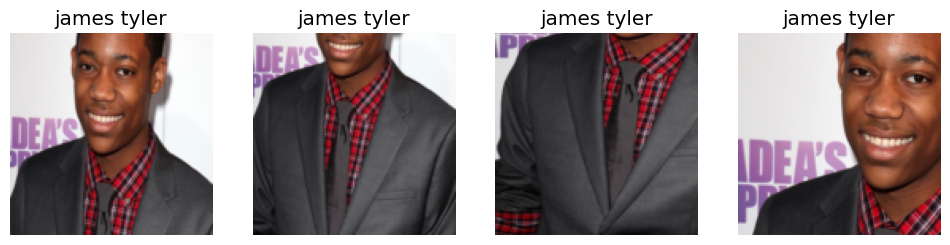

In [19]:
#resize
guitars = guitars.new(item_tfms = RandomResizedCrop(128,
                                                 min_scale = 0.2))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

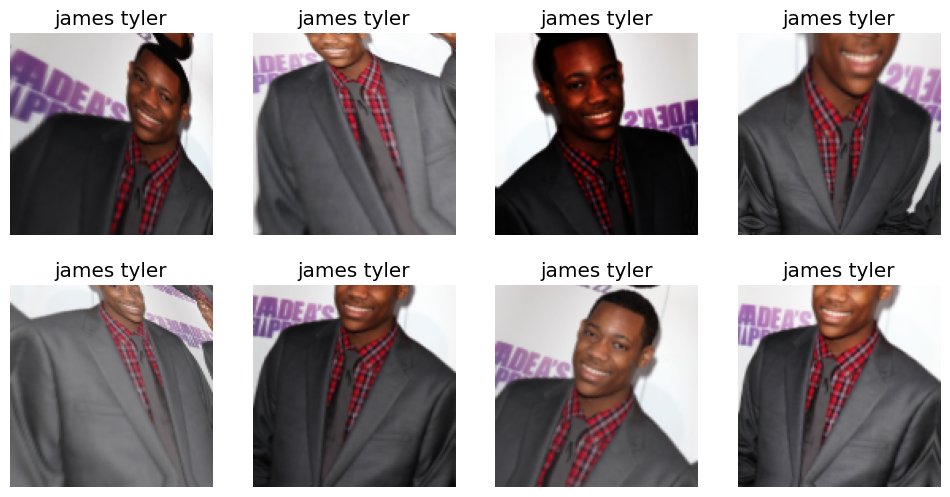

In [20]:
guitars = guitars.new(item_tfms=Resize(128),
                     batch_tfms = aug_transforms(mult=2))
dls = guitars.dataloaders(path)
dls.train.show_batch(max_n = 8, 
                    unique = True)


In [21]:
guitars = guitars.new(item_tfms=RandomResizedCrop(224, min_scale = 0.3),
                     batch_tfms = aug_transforms())

dls = guitars.dataloaders(path)


In [22]:
#learner
learn = vision_learner(dls, resnet18,
                      metrics = error_rate)

learn.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.102721,1.349101,0.399648,01:45


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.835420,1.126302,0.369718,01:43
1,1.494720,0.934129,0.295775,01:44
2,1.221662,0.789535,0.234155,01:44
3,1.046655,0.768310,0.227113,01:44


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


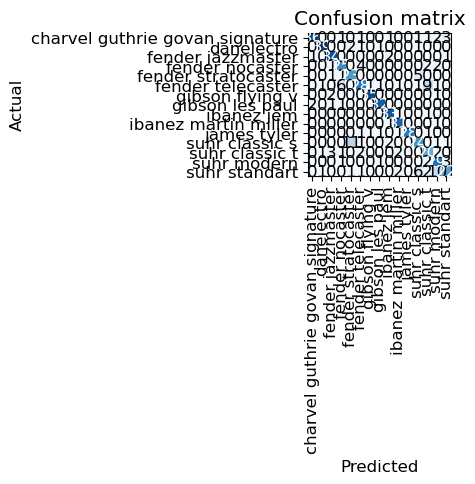

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
# load learner
#learn_inf = load_learner(path/'export.pkl')
learn.dls.vocab

['charvel guthrie govan signature', 'danelectro', 'fender jazzmaster', 'fender nocaster', 'fender stratocaster', 'fender telecaster', 'gibson flying v', 'gibson les paul', 'ibanez jem', 'ibanez martin miller', 'james tyler', 'suhr classic s', 'suhr classic t', 'suhr modern', 'suhr standart']